In [142]:
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd 
import numpy as np
import random
import seaborn as sns
import re

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC

from sklearn.tree import export_graphviz


% matplotlib inline

In [71]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [72]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [74]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [75]:
total = train.isnull().sum().sort_values(ascending=False)
percent_1 = train.isnull().sum()/train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head()

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


In [76]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

Text(0.5, 1.0, 'Male')

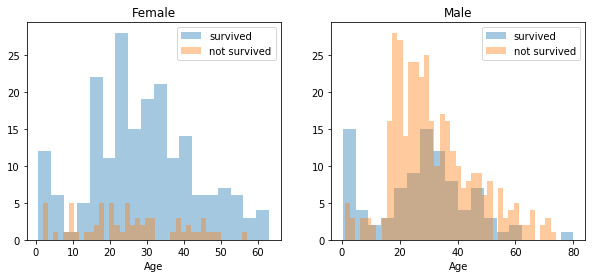

In [77]:
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
women = train[train['Sex'] == 'female']
men = train[train['Sex'] == 'male']

ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins = 18, label = survived, ax = axes[0], kde = False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins = 40, label = not_survived, ax = axes[0], kde = False)
ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins = 18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins = 40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

C:\Users\ariefTora\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ariefTora\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


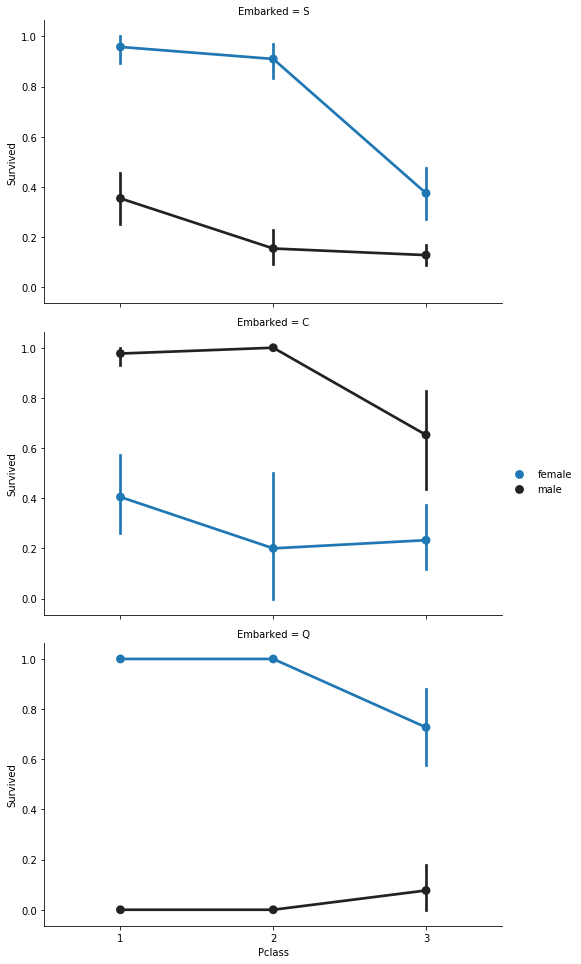

In [78]:
FacetGrid = sns.FacetGrid(train, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None, order=None, hue_order=None)
FacetGrid.add_legend()

C:\Users\ariefTora\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


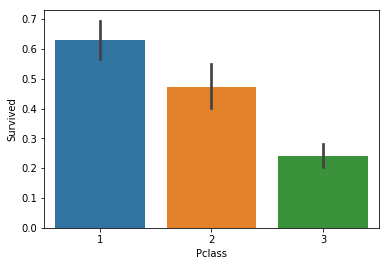

In [79]:
sns.barplot(x='Pclass', y='Survived', data=train)

C:\Users\ariefTora\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


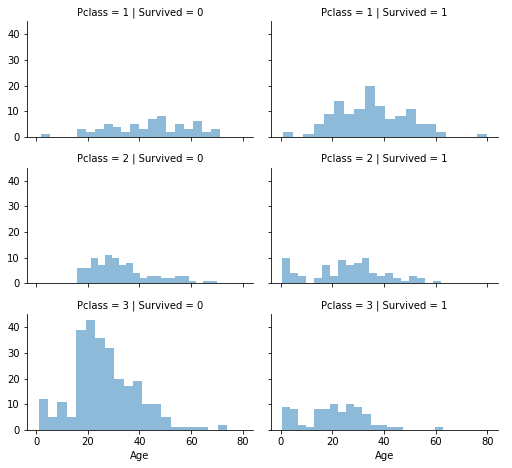

In [80]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend()

In [81]:
data = [train, test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
    
train['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

C:\Users\ariefTora\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ariefTora\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


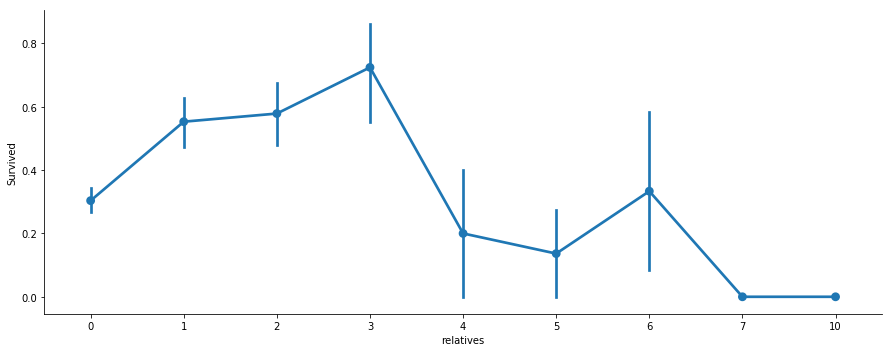

In [82]:
axes = sns.factorplot('relatives', 'Survived', data=train, aspect=2.5)

In [83]:
train = train.drop(['PassengerId'], axis=1)

In [84]:
df = pd.DataFrame(np.arange(12).reshape(3,4), columns=['A','B','C','D'])

In [85]:
deck = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'U': 8}
data = [train, test]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna('U0')
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile('([a-zA-Z]+)').search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
    
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

In [86]:
data = [train, test]

for dataset in data:
    mean = train['Age'].mean()
    std = test['Age'].std()
    is_null = dataset['Age'].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size=is_null)
    age_slice = dataset['Age'].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset['Age'] = age_slice
    dataset['Age'] = train['Age'].astype(int)
    
train['Age'].isnull().sum()

0

In [87]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [88]:
common_value = 'S'
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null object
Age          891 non-null int32
SibSp        891 non-null int64
Parch        891 non-null int64
Ticket       891 non-null object
Fare         891 non-null float64
Embarked     891 non-null object
relatives    891 non-null int64
not_alone    891 non-null int32
Deck         891 non-null int32
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 80.1+ KB


In [90]:
data = [train, test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [91]:
data = [train, test]
titles ={'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}

for dataset in data:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace(['Laddy', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 
                                                'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Mrs')
    dataset['Title'] = dataset['Title'].map(titles)
    dataset['Title'] = dataset['Title'].fillna(0)
    
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

In [92]:
genders = {'male': 0, 'female': 1}
data = [train, test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [93]:
train['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

In [94]:
train = train.drop('Ticket', axis=1)
test = test.drop('Ticket', axis=1)

In [95]:
ports = {'S': 0, 'C': 1, 'Q': 2}
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [96]:
data = [train, test]

for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[dataset['Age'] > 66 , 'Age'] = 7
    
train['Age'].value_counts()

4    159
6    154
5    153
3    138
2    116
1     96
0     68
7      7
Name: Age, dtype: int64

In [97]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,7,0,1,0,8,1.0
1,1,1,1,5,1,0,71,1,1,0,3,3.0
2,1,3,1,3,0,0,7,0,0,1,8,2.0
3,1,1,1,5,1,0,53,0,1,0,3,3.0
4,0,3,0,5,0,0,8,0,0,1,8,1.0


In [98]:
data = [train, test]

for dataset in data:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare'] = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare'] = 4
    dataset.loc[dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

train['Fare'].value_counts()

0    241
2    223
1    216
3    158
4     44
5      9
Name: Fare, dtype: int64

In [99]:
data = [train, test]
for dataset in data:
    dataset['Age_Class'] = dataset['Age'] * dataset['Pclass']

In [100]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare'] / (dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)
    
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1.0,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3.0,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2.0,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3.0,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1.0,15,1
5,0,3,0,6,0,0,1,2,0,1,8,1.0,18,1
6,0,1,0,6,0,0,3,0,0,1,5,1.0,6,3
7,0,3,0,0,3,1,2,0,4,0,8,4.0,0,0
8,1,3,1,3,0,2,1,0,2,0,8,3.0,9,0
9,1,2,1,1,1,0,2,1,1,0,8,3.0,2,1


In [101]:
for dataset in data:
    dataset['Title'] = dataset['Title'].astype(int)

In [102]:
train.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1


In [103]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,892,3,0,2,0,0,0,2,0,1,8,1,6,0
1,893,3,1,5,1,0,0,0,1,0,8,3,15,0
2,894,2,0,3,0,0,1,2,0,1,8,1,6,1
3,895,3,0,5,0,0,1,0,0,1,8,1,15,1
4,896,3,1,5,1,1,1,0,2,0,8,3,15,0


In [104]:
x_train = train.drop('Survived', axis=1)
y_train = train['Survived']
x_test = test.drop('PassengerId', axis=1).copy()

In [105]:
#Stochastic Gradient Decent(SGD)

sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)

sgd.score(x_train, y_train)

acc_sgd = round(sgd.score(x_train, y_train) * 100, 2)

In [106]:
#Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

y_prediction = random_forest.predict(x_test)

random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)

In [108]:
#Logistic Regression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

acc_log = round(logreg.score(x_train, y_train) * 100, 2)

C:\Users\ariefTora\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [112]:
#K Nearest Neighbor

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

acc_knn = round(knn.score(x_train, y_train) * 100, 2)

In [113]:
#Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)

y_pred = gaussian.predict(x_test)

acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)

In [114]:
#Perceptron

perceptron = Perceptron(max_iter=5)
perceptron.fit(x_train, y_train)

y_pred = perceptron.predict(x_test)

acc_perceptron = round(perceptron.score(x_train, y_train) * 100, 2)

In [115]:
#Linear Support Vector Machine 

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)

y_pred = linear_svc.predict(x_test)

acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)

C:\Users\ariefTora\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [120]:
#Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

y_pred = decision_tree.predict(x_test)

acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)

In [126]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes',
             'Perceptron', 'Stochastic Gradient Decent', 'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian,
             acc_perceptron, acc_sgd, acc_desision_tree]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
92.70,Random Forest
92.70,Decision Tree
85.63,KNN
82.04,Logistic Regression
81.59,Support Vector Machines
80.92,Perceptron
79.46,Stochastic Gradient Decent
79.35,Naive Bayes


In [122]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, x_train, y_train, cv=10, scoring='accuracy')

print('Scores:', scores)
print('Means:', scores.mean())
print('Standard deviation:', scores.std())

Scores: [0.8        0.81111111 0.76404494 0.83146067 0.88764045 0.85393258
 0.78651685 0.7752809  0.83146067 0.85227273]
Means: 0.8193720917035524
Standard deviation: 0.037091549914592355


In [125]:
importances = pd.DataFrame({'feature': x_train.columns, 
                            'importance': np.round(random_forest.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending=False).set_index('feature')

importances.head(15)

,importance
feature,
Sex,0.205
Title,0.159
Age_Class,0.100
Deck,0.095
Age,0.079
Pclass,0.068
Fare,0.062
relatives,0.059
Embarked,0.053


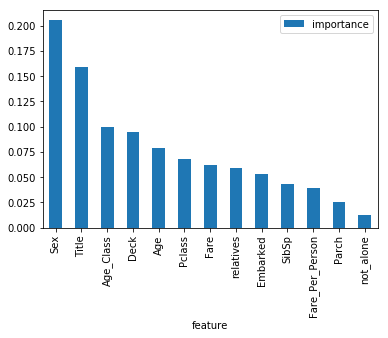

In [128]:
importances.plot.bar()

In [129]:
train = train.drop('not_alone', axis=1)
test = test.drop('not_alone', axis=1)

train = train.drop('Parch', axis=1)
test = test.drop('Parch', axis=1)

In [131]:
#Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score=True)
random_forest.fit(x_train, y_train)
y_prediction = random_forest.predict(x_test)

random_forest.score(x_train, y_train)

acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

92.7 %


In [132]:
print("oob score:", round(random_forest.oob_score_,4) * 100, "%")

oob score: 81.03 %


In [135]:
param_grid = {'criterion': ['gini', 'entropy'], 
              'min_samples_leaf': [1, 5, 10, 25, 50, 70],
              'min_samples_split': [2, 4, 10, 12, 16, 18, 25, 35],
              'n_estimators': [100, 400, 700, 1000, 1500]}

from sklearn.model_selection import GridSearchCV, cross_val_score

rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)

clf.fit(x_train, y_train)

clf.best_params_

C:\Users\ariefTora\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


AttributeError: 'GridSearchCV' object has no attribute 'best_params'

In [136]:
clf.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 12,
 'n_estimators': 400}

In [146]:
random_forest = RandomForestClassifier(criterion = 'gini',
                                      min_samples_leaf = 1,
                                      min_samples_split = 12,
                                      n_estimators = 400,
                                      max_features = 'auto',
                                      oob_score = True,
                                      random_state = 1,
                                      n_jobs = -1)

random_forest.fit(x_train, y_train)
y_prediction = random_forest.predict(x_test)

random_forest.score(x_train, y_train)

print("oob score:", round(random_forest.oob_score_, 4) * 100, '%')


oob score: 83.28 %


In [148]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

predictions = cross_val_predict(random_forest, x_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[498,  51],
       [ 92, 250]], dtype=int64)

In [149]:
from sklearn.metrics import precision_score, recall_score

print('Precision:', precision_score(y_train, predictions))
print('Recall:', recall_score(y_train, predictions))

Precision: 0.8305647840531561
Recall: 0.7309941520467836


In [150]:
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

0.7776049766718507

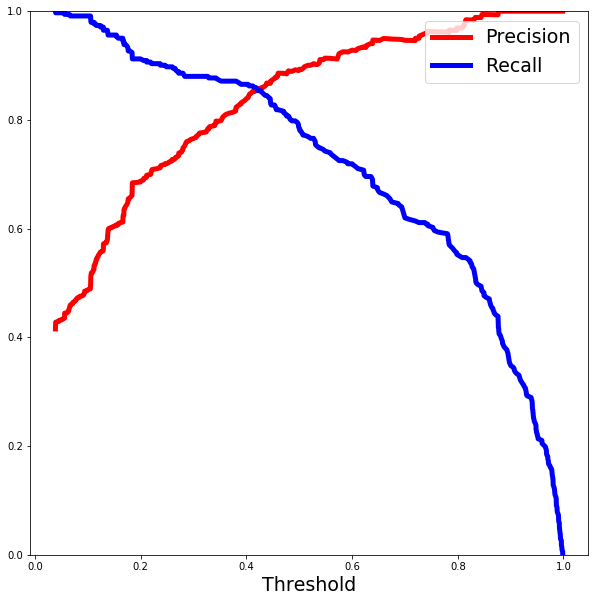

In [158]:
from sklearn.metrics import precision_recall_curve

y_scores = random_forest.predict_proba(x_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)

def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], 'r-', label='Precision', linewidth=5)
    plt.plot(threshold, recall[:-1], 'b', label='Recall', linewidth=5)
    plt.xlabel('Threshold', fontsize=19)
    plt.legend(loc='upper right', fontsize=19)
    plt.ylim([0, 1])
    
plt.figure(figsize=(10, 10))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

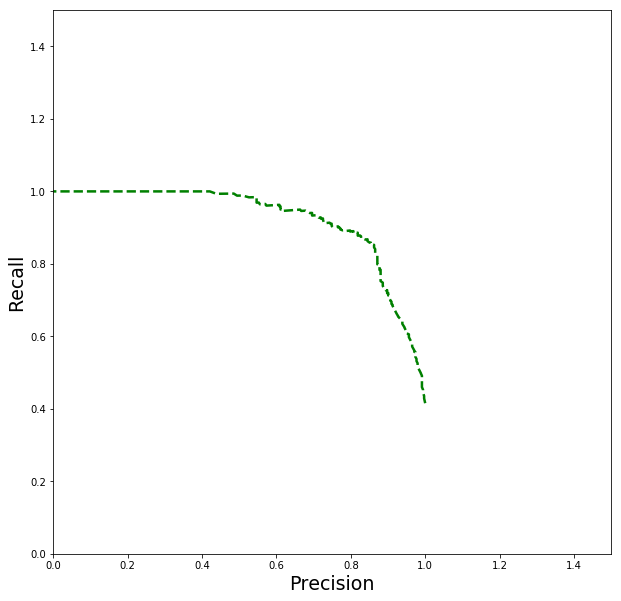

In [157]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, 'g--', linewidth=2.5)
    plt.ylabel('Recall', fontsize=19)
    plt.xlabel('Precision', fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])
    
plt.figure(figsize=(10,10))
plot_precision_vs_recall(precision, recall)
plt.show()

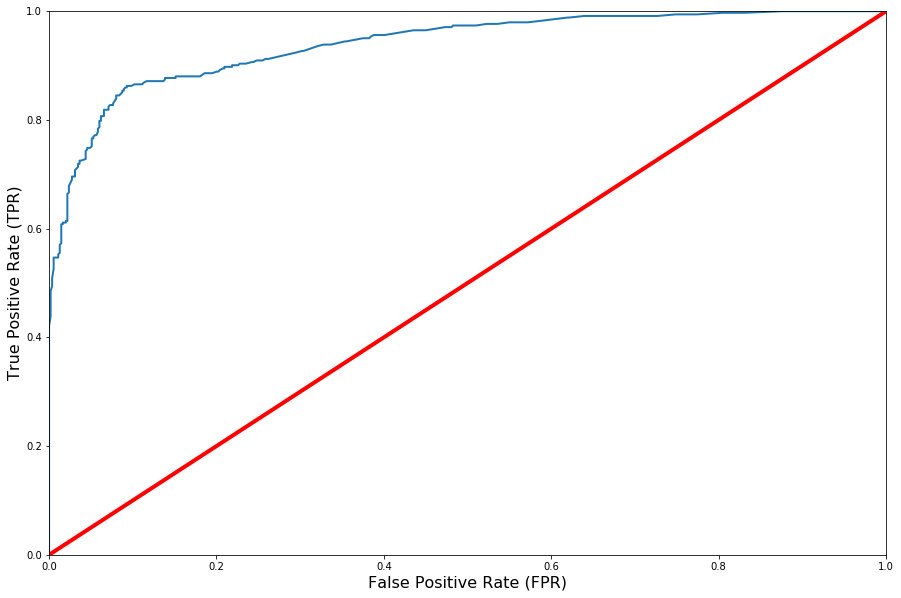

In [164]:
from sklearn.metrics import roc_curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)
    
plt.figure(figsize=(15,10))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [165]:
from sklearn.metrics import roc_auc_score

r_a_score = roc_auc_score(y_train, y_scores)
print('ROC-AUC-Score:', r_a_score)

ROC-AUC-Score: 0.9389213775178686


In [169]:
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,3,0,2,0,0,0,2,0,1,8,1,6,0
1,3,1,5,1,0,0,0,1,0,8,3,15,0
2,2,0,3,0,0,1,2,0,1,8,1,6,1
3,3,0,5,0,0,1,0,0,1,8,1,15,1
4,3,1,5,1,1,1,0,2,0,8,3,15,0


In [171]:
y_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [173]:
kaggle = pd.DataFrame({'PassengerID': test['PassengerId'], 'Survived':y_prediction})

In [175]:
kaggle.head(15)

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [176]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Fare,Embarked,relatives,Deck,Title,Age_Class,Fare_Per_Person
0,892,3,0,2,0,0,2,0,8,1,6,0
1,893,3,1,5,1,0,0,1,8,3,15,0
2,894,2,0,3,0,1,2,0,8,1,6,1
3,895,3,0,5,0,1,0,0,8,1,15,1
4,896,3,1,5,1,1,0,2,8,3,15,0


In [179]:
kaggle.to_csv('titanic_pred.csv', index=False)

In [180]:
kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerID    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.6 KB


In [182]:
kaggle.head(15)

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
